## 신경망 학습

In [1]:
import numpy as np

In [2]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 2
t= [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1 : '2'일 확률이 가장 높다고 추정함 (0.6)
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))


#예2 : '7'일 확률이 가장 높다고 추정함 (0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] 
print(sum_squares_error(np.array(y2), np.array(t)))


0.09750000000000003
0.5975


`교차 엔트로피`

In [4]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

     - 아주 작은 값인 delta를 더함 (np.log()  함수에 0을 입력하면 마이너스 무한대 -inf 가 나오게 됨)
     - 아주 작은 값을 더해서 절대 0이 되지 않도록, 마이너스 무한대가 발생하지 않도록 한 것

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


In [6]:
import sys, os
import numpy as numpy 
import tensorflow as tf

(x_train, t_train), (x_test, t_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(train_size)
print(batch_mask)
print(x_batch)
print(t_batch)

60000
[36535 23595  3286 46429 40057 53425 44573 22980 40966 25431]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 4 0 7 5 1 7 4 5 3]


    - 훈련 데이터는 60,000개이고 입력 데이터는 784열(28x28)
    - 정답 레이블은 10줄로된 데이터
    - np.random.choice()로 지정한 범위 수 중에서 무작위로 원하는 개수만 꺼냄 
       예) np.random.choice(660000,10) 은 0이상 60000 미만의 수 중에서 무작위로 10개를 골라냄
    - 무작위로 뽑은 인덱스로 미니배치를 뽑아내고, 손실함수도 이 미니배치로 계산함

`(배치용) 교차 엔트로피 오차 구하기`

In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t *np.log(y+1e-7)) / batch_size

     - y : 신경망 출력, t : 정답 레이블
     - y가 1차원이라면, 데이터 하나당 교차 엔트로피 오차를 구할 경우 reshape로 데이터 형상 바꿔줌
     - 배치 크기로 나눠 정규화후 이미지 1장당 평균의 교차 엔트로피 오차를 계산

In [10]:
def cross_entropy_error(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np(log(y[np.arange(batch_size), t] + 1e-7)) / batch_size)

    - 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 계산은 무시해도 좋다는 것이 핵심
    - 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산
    - 원-핫 인코딩 시 t*np.log(y) 였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size),t])로 구현
    - np.log(y[np.arange(batch_size),t]) 
    - np.arange(batch_size)는 0부터 batch_size -1까지의 배열 생성, 
      batch_size가 5면, np.arange(batch_size)는 [0,1,2,3,4] 넘파이 배열 생성
      t에는 [2,7,0,9,4]와 같이 저장되어 있으므로 y[np.range(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출
      : 이 예에서는 y[np.ragne(batch_size), t]는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]])인 넘파이 배열 생성
      

`미분 구현`

In [11]:
# 나쁜 구현

def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x))/h

    - 수치 미분(numerical differenctiation)은 '함수 f'와 '함수 f에 넘길 인수 x' 두 인수를 받음
    - h에 가급적 적은 값을 대입하고 싶어서 가능하다면 h를 0을 무한히 가깝게 하고 싶어서 1e-50 이라는 작은 값 이용
     : 해당 방식은 반올림 오차(rounding error) 문제를 일으킴 
     : 반올림 오차는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생김

In [12]:
np.float32(1e-50)

0.0

     <개선 1>
    - 1e-50을 float32형 (32비트 수동소수점)으로 나타내면 0.0이 되어 올바로 표현할 수 없음
    - 너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 됨
    - 미세한 값 h을 10-4 정도로 사용하면 좋은 결과를 얻음
     
     <개선 2>
     - 앞의 구현에는 x+h와 x 사이의 함수 f의 차분을 계산하고 있음
     - 진정한 미분은 x 위치의 함수의 기울기(접선)에 해당하지만, 위에서 구현한 미분은 (x+h)와 x 사이의 기울기에 해당함
 

In [13]:
def numerical_diff(f,x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

     - 아주 작은 차분으로 미분하는 것을 `수치 미분` 이라고 함
     수식을 전개해 미분하는 것은 '해석적(analytic)' 이라는 말을 이용해 '해석적 해', '해석적으로 미분하다' 로 표현
     - 예를 들어 y=x^2의 미분은 dy/dx = 2x로 풀어낼 수 있음
       x=2일때 y의 미분은 4가 됨
      => 해석적 미분은 오차를 포함하지 않는 '진정한 미분' 값을 구함
      
     - '해석적 미분'은 수학 시간에 배운 미분,
        '수치 미분'은 이를 '근사치'로 계산하는 방법

`수치 미분 구현`

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

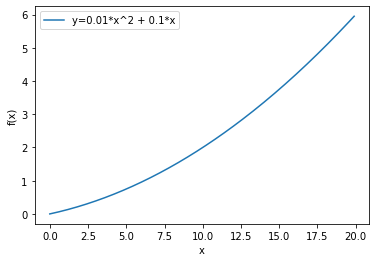

In [15]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)  # 0에서 20까지 0.1 간격의 배열 x를 만듦(20은 미포함)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y, label = 'y=0.01*x^2 + 0.1*x')
plt.legend()
plt.show()

In [16]:
# x가 5일 때와 10일 때의 함수의 미분 계산

print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


`편미분`

In [17]:
def function_2(x):
    return x[0]**2 + x[1]**2  # 혹은 return np.sum(x**2)

    - 인수 x는 넘파이 배열이라고 가정
    - 넘파이 배열의 각 원소를 제곱하고 합을 구하는 구현 (np.sum(x**2))

`x0 = 3, x1 = 4 일 때, x0에 대한 편미분 ∂f/∂x0`

In [18]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


`x0 = 3, x1 = 4 일 때, x1에 대한 편미분 ∂f/∂x1`

In [19]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


`기울기 구현`

In [20]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

     - numerical_gradient(f,x) 함수의 인수인 f는 함수이고, x는 넘파이 배열
     넘파이 배열 x의 각 원소에 대해서 수치 미분을 구함
     - 세 점 (3,4), (0,2), (3,0) 에서의 기울기 구함

In [21]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


    - (x0, x1)의 각 점에서의 기울기를 계산
    - 점 (3,4)의 기울기는 (6,8) / 점 (0,2)의 기울기는 (0,4) / 점 (3,0)의 기울기는 (6,0)

`경사하강법 구현`

In [22]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x

    - 인수 f는 최적화 하려는 함수, init_x : 초기값, lr : learning rate를 의미하는 학습률
    step_num : 경사법에 따른 반복 횟수
    - 함수의 기울기는 numerical_gradient(f,x)로 구하고, 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복

`경사법으로 f(x0, x1)=x0^2 +x1^2 의 최솟값 구하기`

In [23]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


In [24]:
def gradient_descent_graph(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    for i in range(step_num):
        x_history.append(x.copy())
        grad = numerical_gradient(f,x)
        x -= lr*grad
    return x, np.array(x_history)


In [25]:
x, x_history = gradient_descent_graph(function_2, init_x= np.array([-3.0, 4.0]), lr=0.1, step_num=100)

print(x_history)

[[-3.00000000e+00  4.00000000e+00]
 [-2.40000000e+00  3.20000000e+00]
 [-1.92000000e+00  2.56000000e+00]
 [-1.53600000e+00  2.04800000e+00]
 [-1.22880000e+00  1.63840000e+00]
 [-9.83040000e-01  1.31072000e+00]
 [-7.86432000e-01  1.04857600e+00]
 [-6.29145600e-01  8.38860800e-01]
 [-5.03316480e-01  6.71088640e-01]
 [-4.02653184e-01  5.36870912e-01]
 [-3.22122547e-01  4.29496730e-01]
 [-2.57698038e-01  3.43597384e-01]
 [-2.06158430e-01  2.74877907e-01]
 [-1.64926744e-01  2.19902326e-01]
 [-1.31941395e-01  1.75921860e-01]
 [-1.05553116e-01  1.40737488e-01]
 [-8.44424930e-02  1.12589991e-01]
 [-6.75539944e-02  9.00719925e-02]
 [-5.40431955e-02  7.20575940e-02]
 [-4.32345564e-02  5.76460752e-02]
 [-3.45876451e-02  4.61168602e-02]
 [-2.76701161e-02  3.68934881e-02]
 [-2.21360929e-02  2.95147905e-02]
 [-1.77088743e-02  2.36118324e-02]
 [-1.41670994e-02  1.88894659e-02]
 [-1.13336796e-02  1.51115727e-02]
 [-9.06694365e-03  1.20892582e-02]
 [-7.25355492e-03  9.67140656e-03]
 [-5.80284393e-03  7

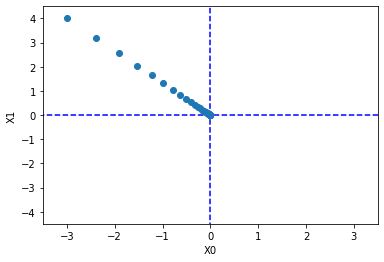

In [26]:
x, x_history = gradient_descent_graph(function_2, init_x= np.array([-3.0, 4.0]), lr=0.1, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

`학습률에 따른 비교`

In [27]:
# 학습률이 너무 큰 경우 lr = 1.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100))

# 학습률이 너무 작은 경우 lr = 1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


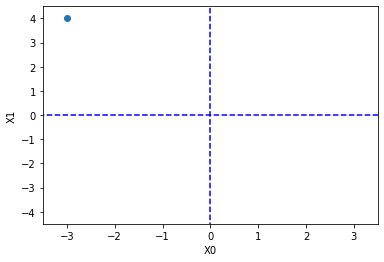

In [28]:
# 학습률이 너무 큰 경우

x, x_history = gradient_descent_graph(function_2, init_x= np.array([-3.0, 4.0]), lr=10.0, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

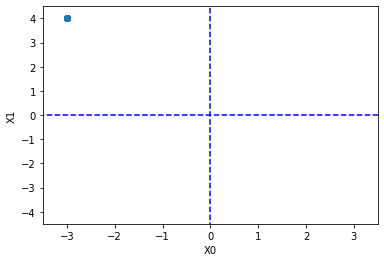

In [29]:
# 학습률이 너무 작은 경우

x, x_history = gradient_descent_graph(function_2, init_x= np.array([-3.0, 4.0]), lr=1e-10, step_num=100)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

`기울기를 구하는 simpleNet`

In [30]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [31]:
def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad


In [32]:
class simpleNet():
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규 분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [33]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0,0,1]) # 정답 레이블
print(net.loss(x,t))

def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW) 

[[-0.01925375 -0.74715466 -1.28994248]
 [-0.30877078  1.03290267  1.00377919]]
[-0.28944595  0.48131961  0.12943579]
1
1.12477516169295
[[ 0.12815906  0.27700559 -0.40516465]
 [ 0.19223859  0.41550839 -0.60774698]]


In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

`2층 신경망 클래스 구현하기`

In [102]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [103]:
def _numerical_gradient_1d(f,x):
    h = 1e-4
    grad = np.zeors_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] =  float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = float(tmp_val) - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / 2*h

        x[idx] = tmp_val

    return grad           


def numerical_gradient_2d(X):
    if X.dim==1:
        return self._numerical_gradient_1d(f, X)

    else:
        grad = np.zeros_like(x)

        for idx, x in enumerate(X):
            grad[idx] = self._numerical_gradeint_1d(f,x)
    return grad

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()   

    return grad

In [104]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self,x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x : 입력데이터, t : 정답 레이블
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    # x : 입력데이터, t : 정답레이블
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [105]:
net = TwoLayerNet(input_size= 784, hidden_size=100, output_size=10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [38]:
x = np.random.rand(100, 784) # 더미 입력 데이터 (100장 분량)
y = net.predict(x)
print(y)

[[0.09522548 0.10626582 0.09337892 0.0996541  0.09084703 0.10867615
  0.09339934 0.10952082 0.10432738 0.09870496]
 [0.09530596 0.10679678 0.09374079 0.10000874 0.09018648 0.10847678
  0.09314295 0.10949702 0.10392098 0.09892354]
 [0.09546692 0.10646829 0.09364807 0.09963517 0.0909209  0.10828131
  0.09324958 0.1091469  0.10433268 0.09885018]
 [0.09552495 0.10632132 0.0936813  0.09973139 0.0905162  0.10829941
  0.09340522 0.10946482 0.10430547 0.09874992]
 [0.09549928 0.10648586 0.09372222 0.09980761 0.09081497 0.10840381
  0.09341487 0.1095198  0.10346792 0.09886366]
 [0.09521038 0.10631824 0.09354034 0.09976689 0.09071761 0.10844598
  0.09342879 0.10959077 0.10411634 0.09886466]
 [0.09542554 0.10614017 0.0937984  0.09949338 0.0907502  0.10848984
  0.09296778 0.10975967 0.10431602 0.09885901]
 [0.09523043 0.10620395 0.09375456 0.09937092 0.09067727 0.10907379
  0.09350063 0.10916065 0.10416495 0.09886285]
 [0.0956111  0.10649426 0.09365349 0.09946434 0.09064288 0.10835646
  0.09317484

In [39]:
x = np.random.rand(100,784) # 더미 입력 데이터 100장 분량
t = np.random.rand(100,10) # 더미 정답 데이터 100장 분량

grads = net.numerical_gradient(x,t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


`미니배치 학습 구현`

In [106]:
import numpy as np
import tensorflow as tf

(x_train, t_train), (y_train, t_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

train_loss_list = []

#하이퍼파라미터

iters_num = 10000 #반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size= 784, hidden_size=100, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # gard = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

KeyboardInterrupt: 

    - 미니배치 크기를 100으로 하여, 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려냄
    - 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신
    - 경사법에 의한 갱신 횟수(반복 횟수)를 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산

`시험 데이터로 평가`

In [107]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [117]:
import numpy as np
import tensorflow as tf

(x_train, t_train), (y_train, t_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784)
y_train = y_train.reshape(10000, 784)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


#하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size =100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc |' + str(train_acc) + ', ' + str(test_acc)) 

AxisError: axis 1 is out of bounds for array of dimension 1

     - 1 에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도 계산 
     - 정확도를 1에폭마다 계산하는 이유는 for 문안에서 매번 게산하기에는 시간이 오래걸리고, 자주 기록할 필요가 없기 때문

array([[-1.32915135, -0.23250927,  0.69811818],
       [ 1.04279034, -1.17171146, -1.15089516]])